In [784]:
import os
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
from matplotlib import rcParams

In [785]:
colors = {
    'etcd': 'gold',
    'ivy-raft': 'skyblue',
    'raftkvs': 'lightgreen',
    'raftres': 'orangered',
    'ironkv': 'purple',
    'vard': 'teal',
    'shopcart': 'royalblue',
    'roshi': 'tomato'
}

hatches = {
    'etcd': '/',
    'ivy-raft': '.',
    'raftkvs': '--',
    'raftres': 'x',
    'ironkv': 'o',
    'vard': '\\',
    'shopcart': '/',
    'roshi': '.',
}

styles = {
    'etcd': ':',
    'ivy-raft': '-.',
    'raftkvs': '-',
    'raftres': '--',
    'ironkv': 'dotted',
}

markers = {
    'etcd': 'o',
    'ivy-raft': 's',
    'raftkvs': 'd',
    'raftres': 'P',
    'ironkv': 'v',
}

display_names = {
    'etcd': 'etcd',
    'raftkvs': 'DCal-RaftKV',
    'raftres': 'DCal-RaftKV-Mod',
    'ivy-raft': 'Ivy-Raft',
    'ironkv': 'IronKV',
    'vard': 'Vard',
    'shopcart': 'DCal-CRDT',
    'roshi': 'Roshi',
}

In [786]:
stream = os.popen('./image/amm results_to_csv.sc')
output = stream.read()
output_sio = StringIO(output)

df = pd.read_csv(output_sio)
df

,errors,latency,name,operationCount,repeatIdx,serverCount,threadCount,throughput,workload
0,0,9837.884,etcd,10000.0,1,3,1.0,101.147007,workloada
1,0,40594.508,etcd,100000.0,1,3,100.0,2396.242691,workloada
2,0,161950.000,etcd,100000.0,1,3,1000.0,5467.767511,workloada
3,0,43795.195,etcd,100000.0,1,3,125.0,2755.124532,workloada
4,0,44450.977,etcd,100000.0,1,3,150.0,3263.494550,workloada
...,...,...,...,...,...,...,...,...,...
926,0,1546133.900,vard,800.0,1,7,21.0,12.638231,workloada
927,0,1503949.800,vard,800.0,1,9,21.0,13.091790,workloada
928,0,1514625.400,vard,800.0,2,9,21.0,13.011727,workloada
929,0,NaN,vard,800.0,3,9,21.0,0.000000,workloada


In [787]:
etcd_df = df[df.name == 'etcd'].groupby(['serverCount', 'workload', 'threadCount']).median()
etcd_df

errors     latency  operationCount  \
serverCount workload  threadCount                                       
3           workloada 1.0             0.0    7246.437         10000.0   
                      20.0            0.0   30467.973         40000.0   
                      40.0            0.0   33899.640         40000.0   
                      60.0            0.0   35827.684         40000.0   
                      80.0            0.0   39709.957         40000.0   
                      100.0           0.0   40381.867        100000.0   
                      125.0           0.0   42015.800        100000.0   
                      150.0           0.0   47022.510        100000.0   
                      175.0           0.0   49777.540        100000.0   
                      200.0           0.0   55876.797        100000.0   
                      225.0           0.0   63617.720        100000.0   
                      250.0           0.0   70681.330        100000.0   
                      275.0           0.0   64255.530        100000.0   
                      300.0           0.0   69418.984        100000.0   
                      350.0           0.0   84786.950        100000.0   
                      400.0           0.0   81154.730        100000.0   
                      500.0           0.0   95861.030        100000.0   
                      600.0           0.0  107881.625        100000.0   
                      700.0           0.0  116425.860        100000.0   
                      800.0           0.0  121203.540        100000.0   
                      1000.0          0.0  161950.000        100000.0   
            workloadb 700.0           0.0   74601.020        100000.0   
                      800.0           0.0   86839.234        100000.0   
                      900.0           0.0   99710.890        100000.0   
            workloadc 700.0           0.0   51643.780        100000.0   
                      800.0           0.0   65038.992        100000.0   
                      900.0           0.0   78851.500        100000.0   
            workloadd 700.0           0.0   72939.670        100000.0   
                      800.0           0.0   81821.240        100000.0   
                      900.0           0.0   91619.750        100000.0   
            workloadf 700.0           0.0   82891.290        100000.0   
                      800.0           0.0  102012.750        100000.0   
                      900.0           0.0   97813.090        100000.0   
5           workloada 500.0           0.0   79369.890        100000.0   
                      600.0           0.0   90967.410        100000.0   
                      700.0           0.0  114907.050        100000.0   
7           workloada 500.0           0.0  107796.320        100000.0   
                      600.0           0.0   96365.670        100000.0   
                      650.0           0.0  121935.180        100000.0   
9           workloada 500.0           0.0   90617.080        100000.0   
                      600.0           0.0  198615.600        100000.0   
                      650.0           0.0  180635.810        100000.0   

                                   repeatIdx    throughput  
serverCount workload  threadCount                           
3           workloada 1.0                3.0    136.881297  
                      20.0               3.0    644.974040  
                      40.0               3.0   1141.617672  
                      60.0               3.0   1619.170984  
                      80.0               3.0   1929.943067  
                      100.0              3.0   2405.291642  
                      125.0              3.0   2883.173798  
                      150.0              3.0   3081.474177  
                      175.0              3.0   3377.693711  
                      200.0              3.0   3438.198384  
                      225.0              3.0   3387.763399  
                      250.0  

In [937]:
a = df[(df.name == 'raftkvs') & (df.serverCount == 3) & (df.threadCount == 60)]['throughput']\
    .median()
print(a)

b = df[(df.name == 'ivy-raft') & (df.serverCount == 3) & (df.threadCount == 91)]['throughput']\
    .median()
print(b)

print(((a-b) / b) * 100)

1591.9
1124.2270938729623
41.59950500000001


In [943]:
a = df[(df.name == 'raftkvs') & (df.serverCount == 3) & (df.threadCount == 60)]['latency']\
    .median() / 1000
print(a)

b = df[(df.name == 'ivy-raft') & (df.serverCount == 3) & (df.threadCount == 91)]['latency']\
    .median() / 1000
print(b)

res = ((b-a) / b) * 100
print(res)

33.67209
58.261375
42.205123033913985


In [919]:
width = 0.18
tick_fontsize = 64
bar_fontsize = 22
bar_label_fontsize = 46
axis_fontsize = 70
legend_fontsize = 55
ytick_frequency = 5
err_bar_width = 4
point_size = 1000

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

def label_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                1.02 * height,
                f'{height:.0f}',
                fontsize=bar_label_fontsize,
                rotation=60,
                ha='center', va='bottom')

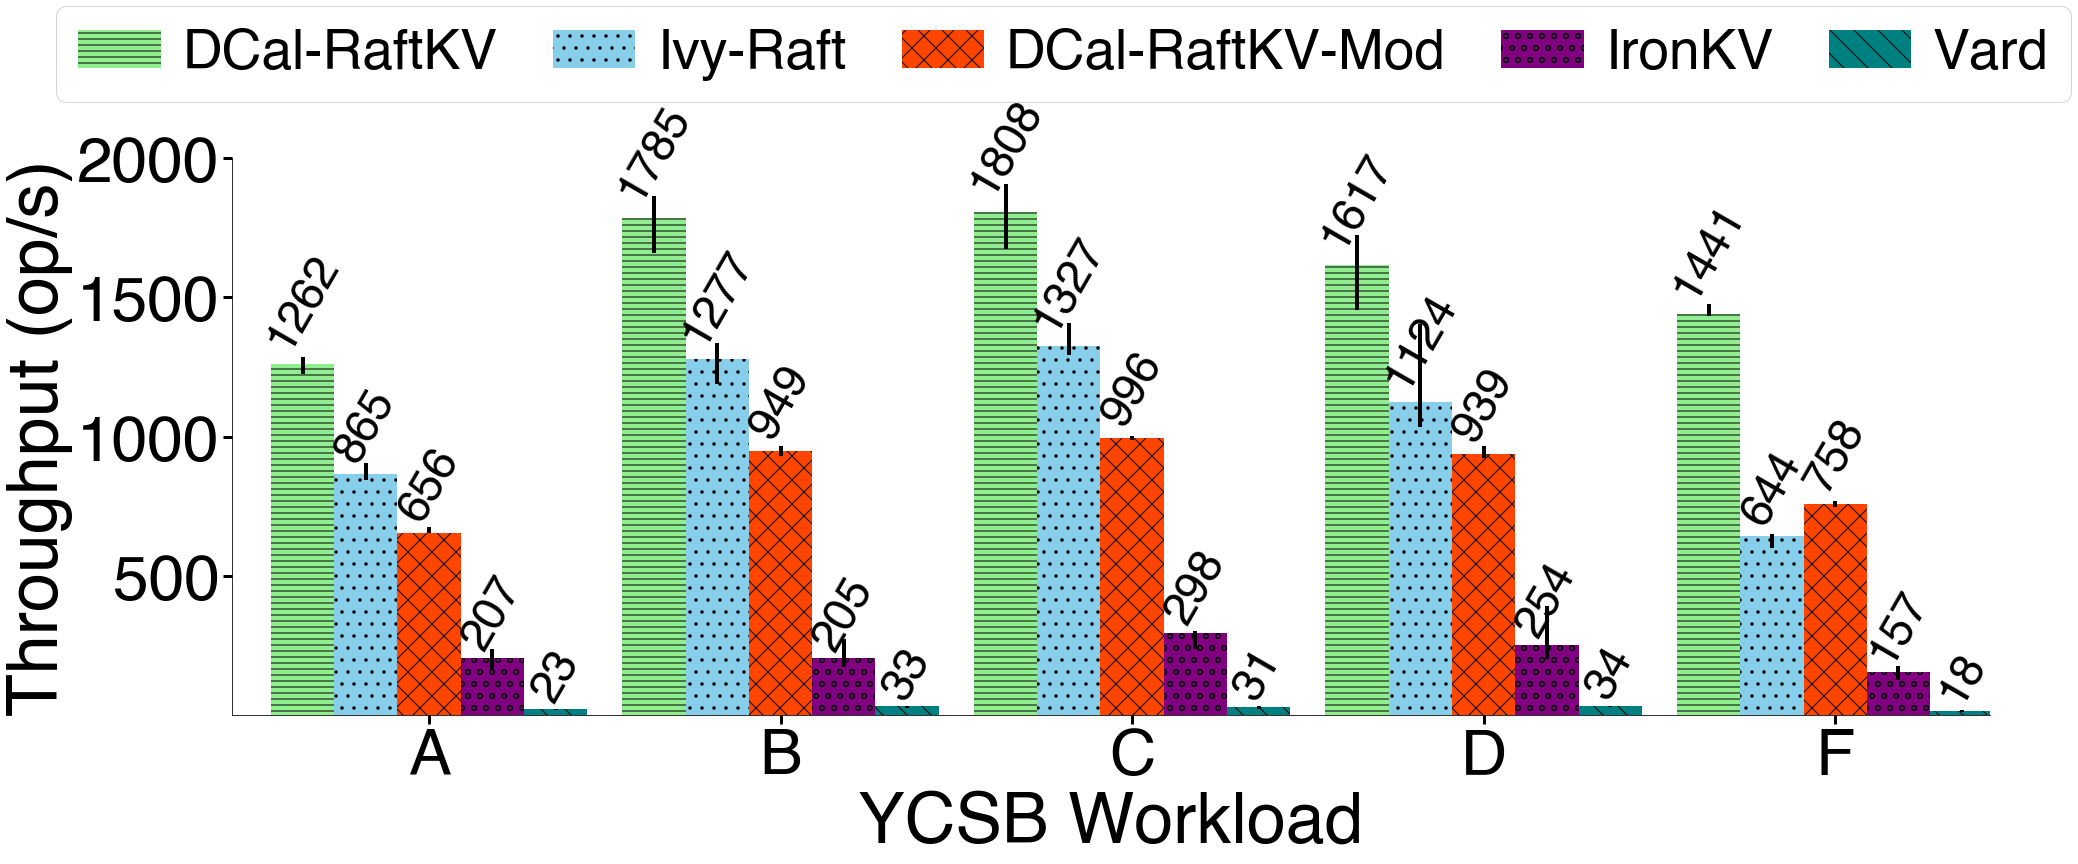

In [920]:
systems = {
    # 'etcd': 700,
    'raftkvs': 60,
    'ivy-raft': 91,
    'raftres': 12,
    'ironkv': 101,
    'vard': 31,
}

fig, ax = plt.subplots(figsize=(30, 12))

N = len(df['workload'].dropna().unique())  # Should be the number of different workloads

# Set x-axis ticks to be workloads and edit render settings (center location, fontsize)
xticklabels = ['A', 'B', 'C', 'D', 'F']
ax.set_xticks(np.arange(N) + 2 * width)
ax.set_xticklabels(xticklabels, fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=tick_fontsize, length=9, width=3)
# TODO: These were arbitrarily set last minute for a good look
plt.xlim(left=-0.2, right=N-.2)

# Remove right and top graph lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ps = []
for i, sys in enumerate(systems):
    peak_thr = systems[sys]
    sys_df = df[(df.name == sys) & (df.serverCount == 3) & (df.threadCount == peak_thr)]
    grouped_df = sys_df.groupby(['workload'])
    med_df = grouped_df.median()['throughput']
    q10_df = med_df - grouped_df['throughput'].quantile(.1)
    q90_df = grouped_df['throughput'].quantile(.9) - med_df
        
    p = ax.bar(np.arange(N) + i * width, med_df, width, 
               facecolor=colors[sys], hatch=hatches[sys],
               yerr=(q10_df, q90_df), error_kw={'lw': err_bar_width})
    ps.append(p)
    label_bars(ax, p)

ax.set_xlabel('YCSB Workload', fontsize=axis_fontsize)
ax.set_ylabel('Throughput (op/s)', fontsize=axis_fontsize)

ax.legend([p[0] for p in ps], 
          [display_names[sys] for sys in systems], 
          loc=(-0.1, 1.1), ncol=5, 
          fontsize=legend_fontsize, handletextpad=0.4, columnspacing=1,
          handlelength=1.5)

ax.tick_params(axis='y', labelsize=tick_fontsize, length=9, width=3)
# y_max = df[df.serverCount == 3]['throughput'].max()
y_max = 2000
ax.set_ylim(1, y_max)
# ax.set_yscale("log")

fig.tight_layout(pad=0.2)
fig.savefig('../paper/fig/raft_YCSB_workload_comparison.pdf')

In [791]:
systems = {
    # 'etcd': 700,
    'raftkvs': 60,
    'ivy-raft': 91,
    'raftres': 12,
    'ironkv': 101,
    'vard': 31,
}

sys = 'ivy-raft'

df[(df.name == sys) & (df.serverCount == 3) & (df.threadCount == systems[sys])].sort_values(by='workload')

# df[(df.name == sys) & (df.serverCount == 7) & (df.threadCount == 91)]

,errors,latency,name,operationCount,repeatIdx,serverCount,threadCount,throughput,workload
403,3,85638.570,ivy-raft,10000.0,1,3,91.0,838.855801,workloada
495,2,79729.490,ivy-raft,10000.0,5,3,91.0,932.053313,workloada
426,1,81386.390,ivy-raft,10000.0,2,3,91.0,853.679358,workloada
472,3,84954.200,ivy-raft,10000.0,4,3,91.0,871.459695,workloada
449,0,83952.230,ivy-raft,10000.0,3,3,91.0,865.351333,workloada
404,2,58161.785,ivy-raft,10000.0,1,3,91.0,1225.790635,workloadb
496,2,57399.820,ivy-raft,10000.0,5,3,91.0,1343.544270,workloadb
427,1,59060.520,ivy-raft,10000.0,2,3,91.0,1277.465508,workloadb
473,0,60702.250,ivy-raft,10000.0,4,3,91.0,1166.452817,workloadb
450,0,55843.110,ivy-raft,10000.0,3,3,91.0,1322.401481,workloadb


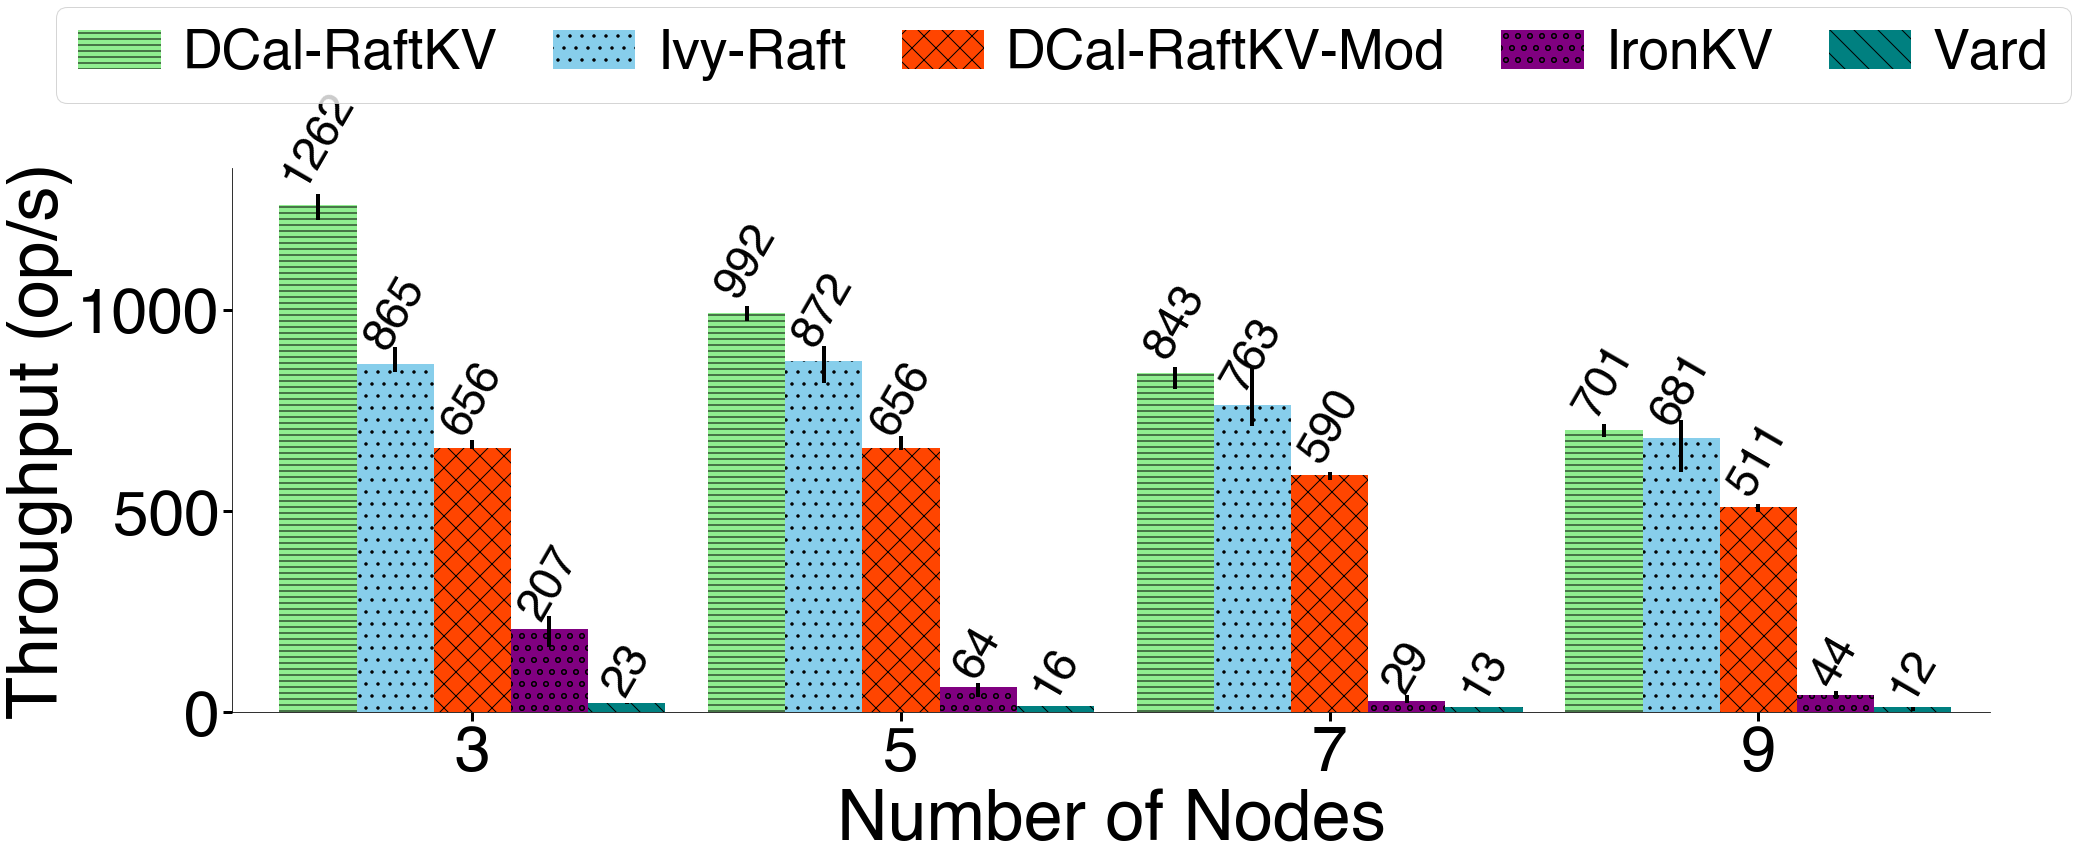

In [921]:
workload = 'workloada'
systems = {
    # 'etcd': {
    #     3: 700,
    #     5: 600,
    #     7: 600,
    #     9: 500,
    # },
    'raftkvs': {
        3: 60,
        5: 48,
        7: 42,
        9: 42,
    },
    'ivy-raft': {
        3: 91,
        5: 91,
        7: 91,
        9: 71,
    },
    'raftres': {
        3: 12,
        5: 16,
        7: 16,
        9: 16,
    },
    'ironkv': {
        3: 101,
        5: 91,
        7: 71,
        9: 81,
    },
    'vard': {
        3: 31,
        5: 21,
        7: 21,
        9: 21,
    }
}

def get_sys_df(sys):
    filtered_df = df[(df.name == sys) & (df.workload == workload)]
    for srvCnt, threadCnt in systems[sys].items():
        filtered_df = filtered_df[
            ((filtered_df.serverCount == srvCnt) & (filtered_df.threadCount == threadCnt))
            | (filtered_df.serverCount != srvCnt)
        ]
    return filtered_df

    
# Create plot with subplots (change size as needed) and set settings values
fig, ax = plt.subplots(figsize=(30, 12))
N = 4 # Should be the number of different node sizes

# Set x-axis ticks to be num_nodes and edit render settings (center location, fontsize)
xticklabels = [3, 5, 7, 9]
ax.set_xticks(np.arange(N) + 2 * width)
ax.set_xticklabels(xticklabels, fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=tick_fontsize, length=9, width=3)
# TODO: These were arbitrarily set last minute for a good look
plt.xlim(left=-0.2, right=N-.1)

# Remove right and top graph lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ps = []
for i, sys in enumerate(systems):
    sys_df = get_sys_df(sys)
    grouped_df = sys_df.groupby(['serverCount'])
    
    med_df = grouped_df.median()['throughput']
    q10_df = med_df - grouped_df['throughput'].quantile(.1)
    q90_df = grouped_df['throughput'].quantile(.9) - med_df
    
    p = ax.bar(np.arange(N) + i * width,
               med_df, width, facecolor=colors[sys], hatch=hatches[sys],
               yerr=(q10_df, q90_df), error_kw={'lw': err_bar_width})
    ps.append(p)
    # Set invidual bar labels
    label_bars(ax, p)

# Axes labels and legend
ax.set_xlabel('Number of Nodes', fontsize=axis_fontsize)
ax.set_ylabel('Throughput (op/s)', fontsize=axis_fontsize)

ax.legend([p[0] for p in ps], 
          [display_names[sys] for sys in systems],
          loc=(-0.1, 1.12), ncol=5, 
          fontsize=legend_fontsize, handletextpad=0.4, columnspacing=1,
          handlelength=1.5)

ax.tick_params(axis='y', labelsize=tick_fontsize, length=9, width=3)
# y_max = 1.5 * 10**3
# ax.set_ylim(1, y_max)
# ax.set_yscale("log")

fig.tight_layout(pad=0.2)
fig.savefig('../paper/fig/raft_nodes_throughput_comparison.pdf')

/opt/homebrew/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


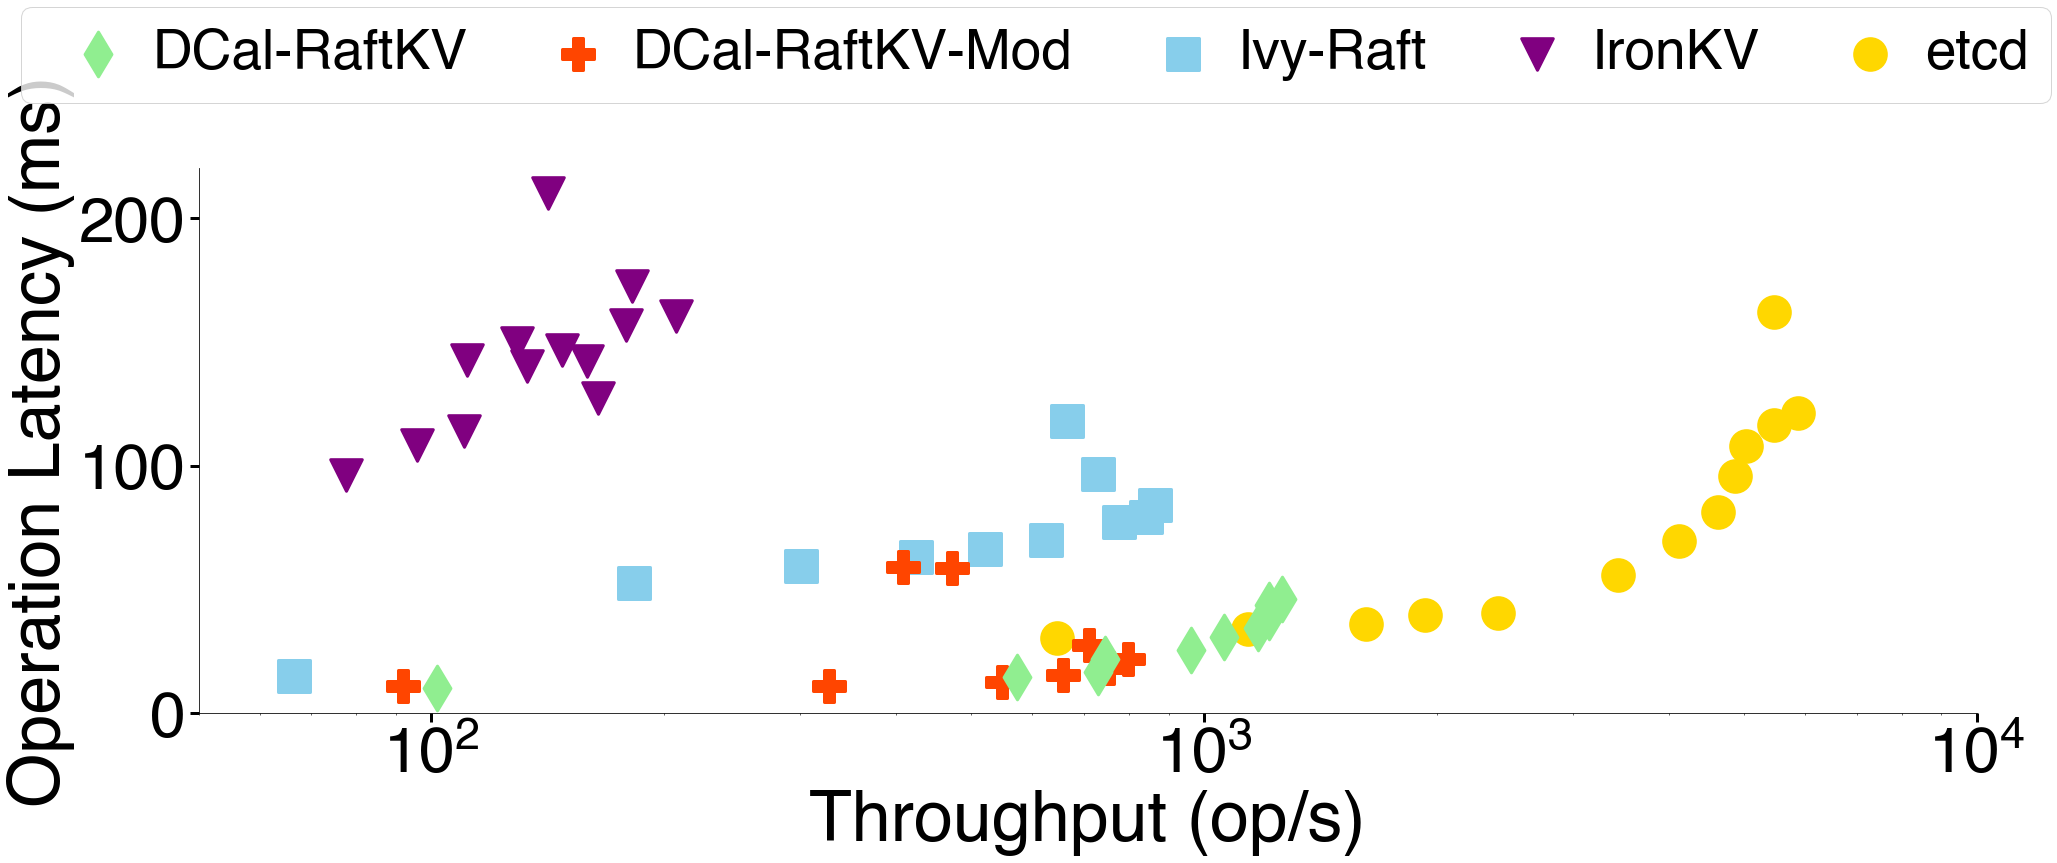

In [922]:
systems = ['etcd', 'ivy-raft', 'ironkv', 'raftres', 'raftkvs',]
legend_order = ['raftkvs', 'raftres', 'ivy-raft', 'ironkv', 'etcd']

filtered_df = df[(df.serverCount == 3) & (df.workload == "workloada")]
filtered_df.loc[:, 'latency'] = filtered_df['latency'].apply(lambda x: x / 1000)

filtered_df = filtered_df.groupby(['name', 'threadCount']).median().reset_index()

fig, ax = plt.subplots(figsize=(30, 12))

#plt.xlim(right=x_max_rounded)
ax.tick_params(axis='x', labelsize=tick_fontsize, length=9, width=3)

# Keep y-axis ticks the same as default and edit font size
# print(ax.get_yticklabels())
# print(fig.xticks())
ax.tick_params(axis='y', labelsize=tick_fontsize, length=9, width=3)

# Remove right and top graph lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for sys in systems:
    sys_df = filtered_df[filtered_df.name == sys]
    if sys == 'etcd':
        sys_df = sys_df[sys_df.threadCount % 20 == 0]
    ax.scatter(sys_df['throughput'], sys_df['latency'],
               label=sys, color=colors[sys], marker=markers[sys],
               s=point_size, linewidths=3)

# Axes labels and legend
plt.xlabel('Throughput (op/s)', fontsize=axis_fontsize)
plt.ylabel('Operation Latency (ms)', fontsize=axis_fontsize)

x_max = filtered_df['throughput'].max()
x_max_rounded = 10**4
ax.set_xlim(50, x_max_rounded)
ax.set_xscale('log')

handles, labels = ax.get_legend_handles_labels()
sys_handles = {}
for label, handle in zip(labels, handles):
    sys_handles[label] = handle

ax.legend([sys_handles[sys] for sys in legend_order], [display_names[sys] for sys in legend_order],
          loc=(-0.1, 1.12), ncol=5, 
          fontsize=legend_fontsize, handletextpad=0, columnspacing=1)

fig.tight_layout(pad=0.1)
fig.savefig('../paper/fig/latency_throughput_comparison.pdf')

In [705]:
filtered_df = filtered_df.groupby(['name', 'threadCount']).median().reset_index()
filtered_df[filtered_df.name == 'vard']

,name,threadCount,errors,latency,operationCount,repeatIdx,serverCount,throughput
65,vard,11.0,0.0,738.34694,2000.0,3.0,3.0,14.689033
66,vard,21.0,0.0,1288.65300,2000.0,3.0,3.0,15.897114
67,vard,26.0,1.0,1287.12420,2000.0,3.0,3.0,19.375339
68,vard,31.0,5.0,1252.49720,2000.0,3.0,3.0,23.456283
69,vard,41.0,9.0,1360.34760,2000.0,3.0,3.0,28.735632
70,vard,51.0,14.0,1525.00120,2000.0,3.0,3.0,31.914215


In [794]:
import json

results_dir = "results/"

systems = ['shopcart', 'roshi']

def check_app_dir(d):
    for sys in systems:
        if d.startswith(sys):
            return True
    return False

def process_lines(lines, ans):
    for line in lines:
        if not line.startswith('RESULT'):
            continue
        _, round_id, node_id, elapsed_str = line.split(' ')
        elapsed = 0
        round_id = int(round_id)
        
        if line.endswith('ms'):
            elapsed = float(elapsed_str[:-2])
        elif line.endswith('µs'):
            elapsed = float(elapsed_str[:-2]) / 1000
        elif line.endswith('ns'):
            elapsed = float(elapsed_str[:-2]) / (1000 * 1000)
        elif line.endswith('s'):
            elapsed = float(elapsed_str[:-1]) * 1000
        else:
            print("FUCK")

        if round_id not in ans:
            ans[round_id] = elapsed
        ans[round_id] = max(ans[round_id], elapsed)

def process_run_file(filename, ans):
    lines = []
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f]
    process_lines(lines, ans)

def process_dir(d, crdt_data):
    config_path = os.path.join(d, 'config.json')
    config = None
    with open(config_path, 'r') as f:
        config = json.load(f)
    ans = {}
    for e in os.listdir(d):
        if e.startswith('run'):
            process_run_file(os.path.join(d, e), ans)
    ans.pop(0, None)
    lst = list(ans.values())
    mean = np.mean(lst)
    crdt_data['name'].append(config['name'])
    crdt_data['serverCount'].append(config['serverCount'])
    crdt_data['repeatIdx'].append(config['repeatIdx'])
    crdt_data['ttcAvg'].append(mean)

crdt_data = {
    'name': [],
    'serverCount': [],
    'repeatIdx': [],
    'ttcAvg': [],
}
for e in os.listdir(results_dir):
    if check_app_dir(e):
        process_dir(os.path.join(results_dir, e), crdt_data)

crdt_df = pd.DataFrame(data=crdt_data)
crdt_df

,name,serverCount,repeatIdx,ttcAvg
0,shopcart,4,3,52.081778
1,shopcart,4,4,51.255657
2,roshi,4,5,32.930559
3,roshi,4,2,28.613952
4,roshi,12,5,60.635432
5,shopcart,8,1,64.406061
6,roshi,12,2,62.515833
7,shopcart,4,5,59.779176
8,shopcart,4,2,63.675793
9,roshi,8,1,36.801545


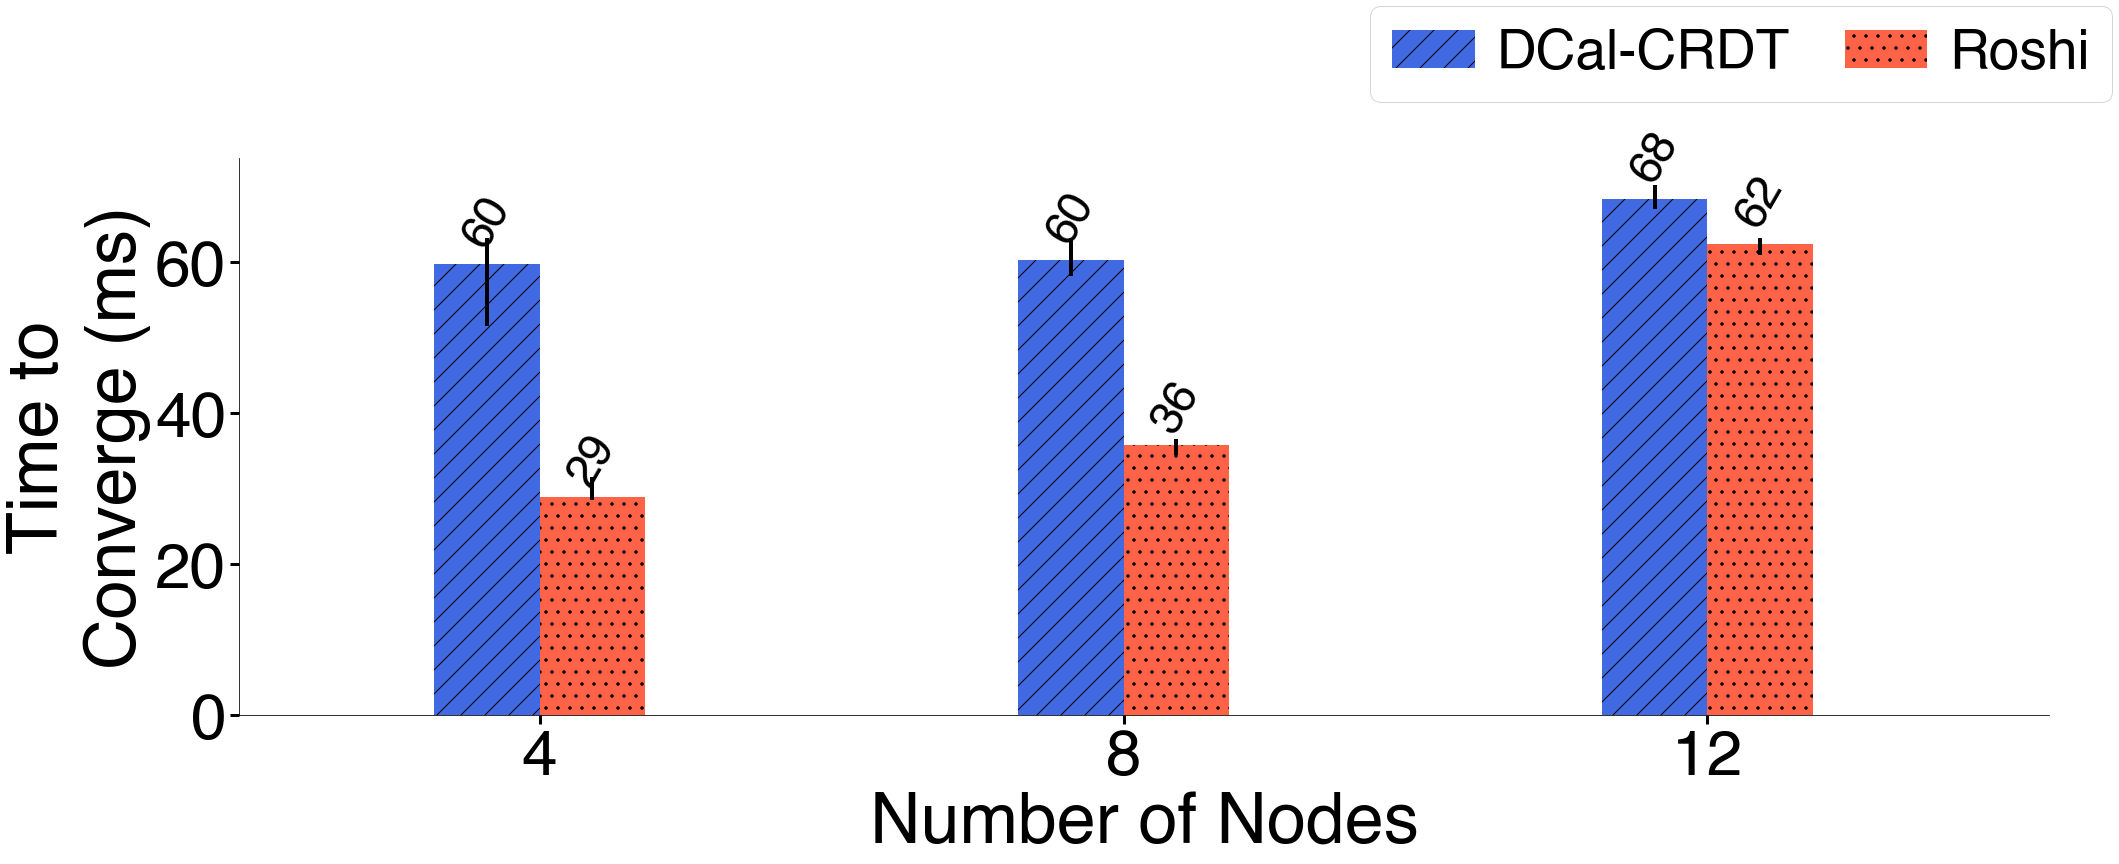

In [923]:
# width = 0.25

systems = ['shopcart', 'roshi']

# Create plot with subplots (change size as needed) and set settings values
fig, ax = plt.subplots(figsize=(30, 12))
N = 3 # Should be the number of different node sizes

offset = 0.225

# Set x-axis ticks to be num_nodes and edit render settings (center location, fontsize)
xticklabels = [4, 8, 12]
ax.set_xticks(np.arange(N) + width / 2 + offset)
ax.set_xticklabels(xticklabels, fontsize=tick_fontsize)
ax.tick_params(axis='x', labelsize=tick_fontsize, length=9, width=3)
# TODO: These were arbitrarily set last minute for a good look
plt.xlim(left=-0.2, right=N-.1)

# Remove right and top graph lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ps = []
for i, sys in enumerate(systems):
    sys_df = crdt_df[crdt_df.name == sys]
    grouped_df = sys_df.groupby(['serverCount'])
    
    med_df = grouped_df.median()['ttcAvg']
    q10_df = med_df - grouped_df['ttcAvg'].quantile(.1)
    q90_df = grouped_df['ttcAvg'].quantile(.9) - med_df
    
    p = ax.bar(np.arange(N) + i * width + offset,
           med_df, width, facecolor=colors[sys], hatch=hatches[sys],
           yerr=(q10_df, q90_df), error_kw={'lw': err_bar_width})
    ps.append(p)
    label_bars(ax, p)

ax.set_xlabel('Number of Nodes', fontsize=axis_fontsize)
ax.set_ylabel('Time to\nConverge (ms)', fontsize=axis_fontsize)

ax.legend([p[0] for p in ps], 
          [display_names[sys] for sys in systems],
          loc=(0.625, 1.1), ncol=2,
          fontsize=legend_fontsize, handletextpad=0.4, columnspacing=1,
          handlelength=1.5)

ax.tick_params(axis='y', labelsize=tick_fontsize, length=9, width=3)

fig.tight_layout(pad=0.2)
fig.savefig('../paper/fig/crdt_graph.pdf')

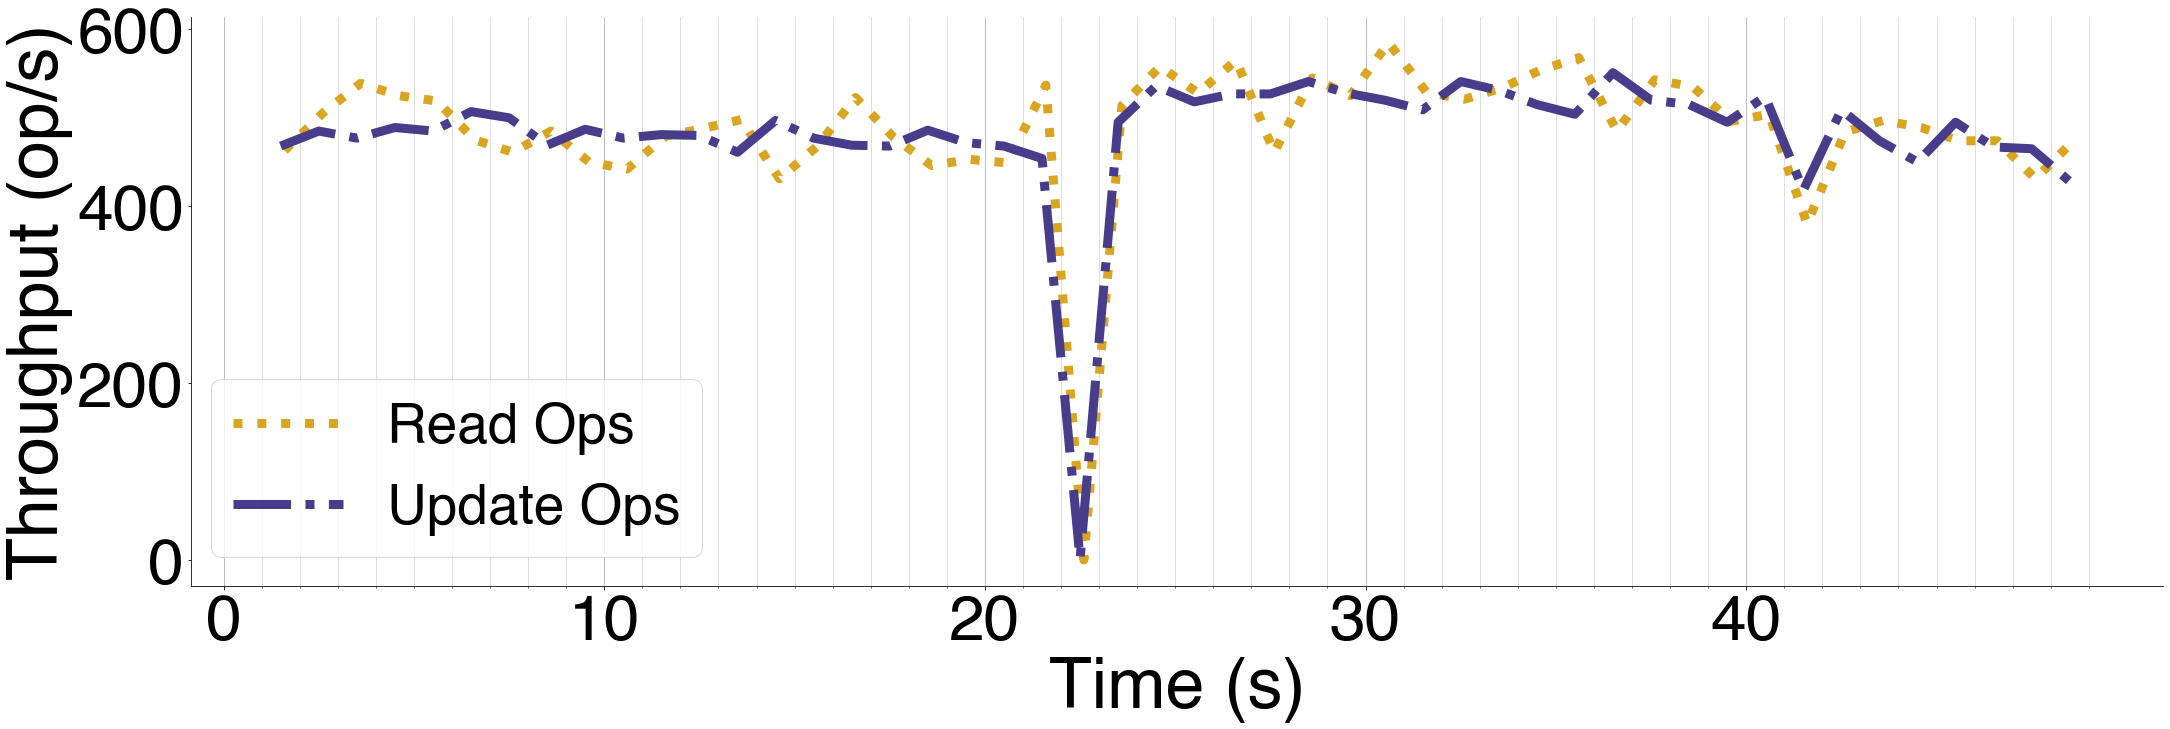

In [924]:
run_logfile = 'failure_run.log'

def munge_timeseries(filename):
    bins = {}
    asterisks_rgx = re.compile(r'^\*+$')
    data_rgx = re.compile(r'(\w+)\s+-\s+Takes\(s\): (\d+(?:\.\d+)?), Count: (\d+),\s+.*$')
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            m = data_rgx.match(line)
            if m:
                bins.setdefault(m.group(1), []).append((float(m.group(2)), float(m.group(3))))
    return bins

def process_bin(series):
    df = pd.DataFrame.from_records(series, columns=('time', 'count'))
    time = df['time']
    count = df['count']
    diff_time = (time.shift(-1) - time)[:-1]
    diff_count = (count.shift(-1) - count)[:-1]
    return pd.DataFrame.from_dict({
        'time': time.shift(-1)[:-1],
        'throughput': diff_count / diff_time,
    })[:-5]

def get_data():
    bins = munge_timeseries(run_logfile)
    # print(bins)
    # assert bins.keys() == {'READ', 'UPDATE'}
    read_series = process_bin(bins['READ'])
    update_series = process_bin(bins['UPDATE'])
    return read_series, update_series


read_data, update_data = get_data()

# print(cols)
# print(data)

# Create plot with subplots(change size as needed) and set settings values
fig, ax = plt.subplots(figsize=(30, 10))

# Keep y-axis ticks the same as default and edit font size
# print(ax.get_yticklabels())
# print(fig.xticks())
ax.tick_params(axis='y', labelsize=tick_fontsize)

# # Remove right and top graph lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Create lines for each series
ax.plot(read_data['time'], read_data['throughput'],
        label='Read Ops', lw=line_width, ls=':', color='goldenrod')
ax.plot(update_data['time'], update_data['throughput'],
        label='Update Ops', lw=line_width, ls='-.', color='darkslateblue')

# Axes labels and legend
plt.xlabel('Time (s)', fontsize=axis_fontsize)
plt.ylabel('Throughput (op/s)', fontsize=axis_fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,
          loc=(0.01, 0.05), ncol=1, fontsize=legend_fontsize)

# Keep x-axis ticks the same as default and edit font size
ax.tick_params(axis='x', labelsize=tick_fontsize)

ax.set_xticks(np.arange(0, 50, 10))
ax.set_xticks(np.arange(0, 50, 1), minor=True)
# ax.set_xticklabels([x for i in range(50)])

plt.grid(axis = 'x')

ax.grid(which='minor', alpha=0.5)

fig.tight_layout(pad=0.2)
fig.savefig('../paper/fig/failure_recovery_comparison.pdf')